# I. Numpy

### Импортируйте NumPy

In [134]:
import numpy as np

### Создайте одномерный массив размера 10, заполненный нулями и пятым элемент равным 1. Трансформируйте в двумерный массив.

In [135]:
ar = np.zeros(10)
ar[4] = 1
ar.reshape(2, 5)


array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0.]])

### Создайте одномерный массив со значениями от 10 до 49 и разверните его (первый элемент становится последним). Найдите в нем все четные элементы.

In [136]:
ar_2 = np.arange(10, 50)
ar_2 = np.flip(ar_2)
ans = ar_2[ar_2 % 2 == 0]
ans

array([48, 46, 44, 42, 40, 38, 36, 34, 32, 30, 28, 26, 24, 22, 20, 18, 16,
       14, 12, 10])

### Создайте двумерный массив 3x3 со значениями от 0 до 8

In [137]:
ar_3 = np.arange(9)
ar_3.reshape(3, 3)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

### Создайте массив 4x3x2 со случайными значениями. Найти его минимум и максимум.

In [138]:
ar_4 = np.random.default_rng().integers(100, size=(4, 5, 2))
f'Min {ar_4.min()}, Max {ar_4.max()}'

'Min 0, Max 97'

### Создайте два двумерных массива размерами 6x4 и 4x3 и произведите их матричное умножение. 

In [139]:
ar_51 = np.arange(24).reshape(6, 4)
ar_52 = np.arange(12).reshape(4, 3)
ar_51 @ ar_52

array([[ 42,  48,  54],
       [114, 136, 158],
       [186, 224, 262],
       [258, 312, 366],
       [330, 400, 470],
       [402, 488, 574]])

### Создайте случайный двумерный массив 7x7, найти у него среднее и стандартное отклонение. Нормализуйте этот массив.

In [140]:
ar_6 = np.random.rand(7, 7)
mean_6 = np.mean(ar_6)
std_6 = np.std(ar_6)
norm_ar6 = (ar_6 - mean_6) / std_6
print(f' Mean: {mean_6},\n Standard: {std_6}\n Normalized:\n {norm_ar6}')


 Mean: 0.5351110511831229,
 Standard: 0.2658413339729509
 Normalized:
 [[-0.24866897 -0.53081515  0.76599942  0.60000762 -0.36398791  0.34556021
  -0.65627529]
 [-1.06717368  0.15168096 -0.87967982  1.63797234  1.33458117  0.0198419
   0.38157253]
 [-0.17980009 -0.8912302   1.37215341 -0.90290252 -0.79827976 -1.4225564
  -0.86268134]
 [ 1.72158943 -0.40699283 -1.60500668 -0.70998056  0.04251915  1.62726572
  -1.17210847]
 [ 1.50391038  0.18544959 -0.20581524  0.64887828 -1.606751   -0.81478345
   0.23644893]
 [ 0.94829096  0.63639783  0.76313928  1.37240432  0.87575735  1.55440731
  -0.33860154]
 [-0.4537292   1.70830224  0.68073697 -0.90239135 -1.00553856 -1.59466149
  -1.49445576]]


# II. Pandas

### Импортируйте: pandas, matplotlib, seaborn

In [141]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

### Загрузите датасет Tips из набора датасетов seaborn

In [142]:
df = pd.DataFrame(sns.load_dataset('tips'))


### Посмотрите на первые 5 строчек

In [143]:
df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Узнайте сколько всего строчек и колонок в данных

In [144]:
f'row: {len(df)}, columns: {df.shape[1]}'

'row: 244, columns: 7'

### Проверьте есть ли пропуски в данных

In [145]:
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

### Посмотрите на распределение числовых признаков

In [146]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### Найдите максимальное значение 'total_bill'

In [147]:
df['total_bill'].max()

50.81

### Найдите количество курящих людей

In [148]:
df.query('smoker == "Yes"').count().max()

93

### Узнайте какой средний 'total_bill' в зависимости от 'day'

In [149]:
df.groupby('day')['total_bill'].mean()

day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64

### Отберите строчки с 'total_bill' больше медианы и узнайте какой средний 'tip' в зависимости от 'sex'

In [150]:
df.query('total_bill > @df.total_bill.median()').groupby('sex')['tip'].mean()

sex
Male      3.756404
Female    3.663939
Name: tip, dtype: float64

### Преобразуйте признак 'smoker' в бинарный (0-No, 1-Yes)

In [151]:
df['smoker'] = df['smoker'].map({'Yes': 1, 'No': 0})

In [152]:
df.sample(5)

,total_bill,tip,sex,smoker,day,time,size
227,20.45,3.00,Male,0,Sat,Dinner,4
174,16.82,4.00,Male,1,Sun,Dinner,2
206,26.59,3.41,Male,1,Sat,Dinner,3
40,16.04,2.24,Male,0,Sat,Dinner,3
189,23.10,4.00,Male,1,Sun,Dinner,3


# III. Visualization

### Постройте гистограмму распределения признака 'total_bill'

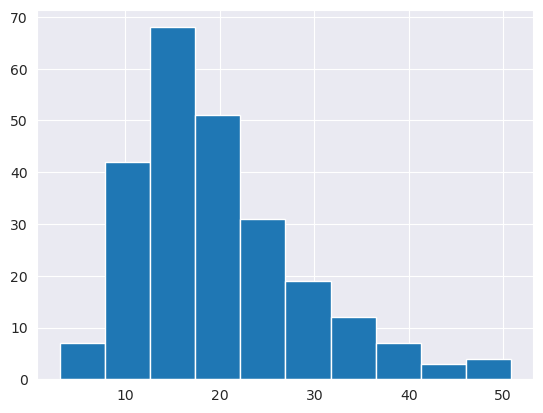

In [153]:
plt.hist(df['total_bill']);

### Постройте scatterplot, представляющий взаимосвязь между признаками 'total_bill' и 'tip'

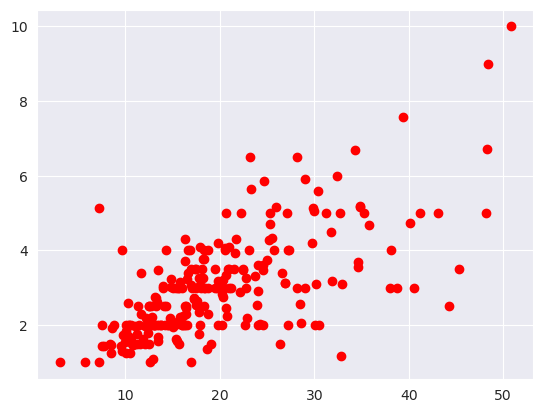

In [154]:
plt.scatter(df['total_bill'], df['tip'], c='red');

### Постройте pairplot

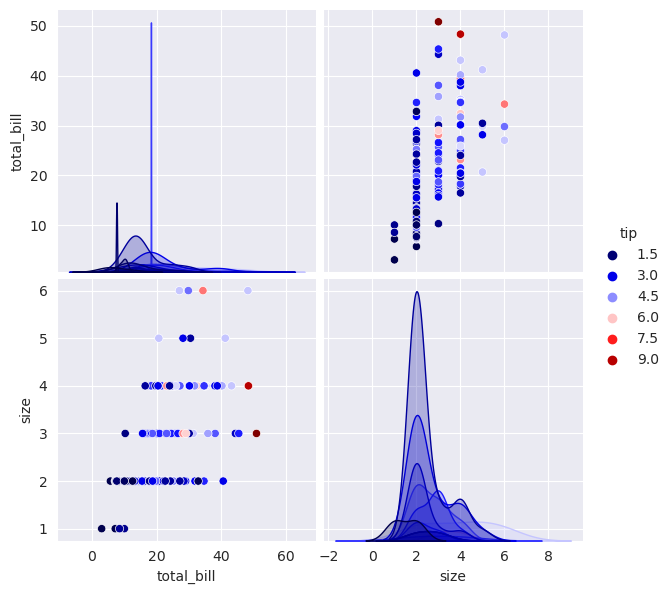

In [155]:
sns.pairplot(df, height=3, hue='tip', palette='seismic');

### Постройте график взаимосвязи между признаками 'total_bill' и 'day'

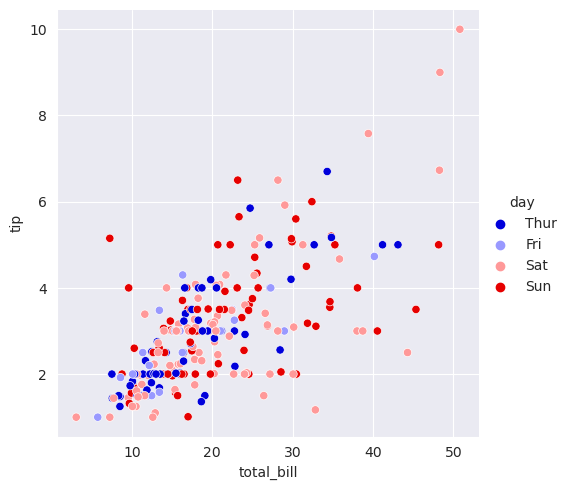

In [156]:
sns.relplot(x='total_bill', y='tip', data=df, hue='day', palette='seismic');

### Постройте две гистограммы распределения признака 'tip' в зависимости от категорий 'time'

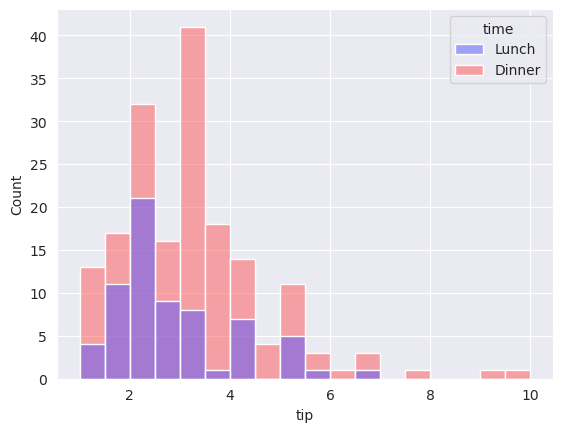

In [157]:
sns.histplot(x='tip', data=df, hue='time', palette='seismic');

### Постройте два графика scatterplot, представляющих взаимосвязь между признаками 'total_bill' и 'tip' один для Male, другой для Female и раскрасьте точки в зависимоти от признака 'smoker'

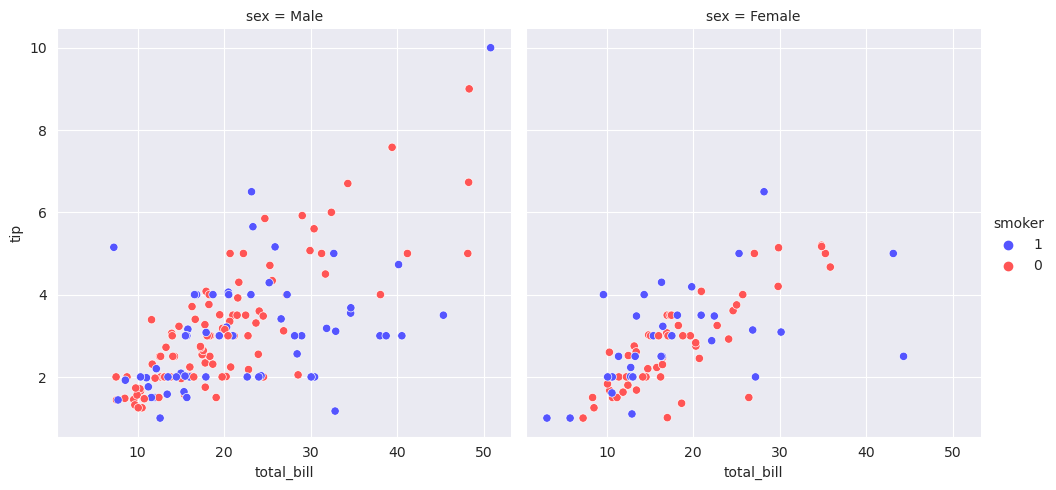

In [158]:
sns.relplot(x='total_bill', y='tip', data=df, hue='smoker', palette='seismic', col='sex');

## Сделайте выводы по анализу датасета и построенным графикам. По желанию можете продолжить анализ данных и также отразить это в выводах.

В загруженном датасете "tips" есть 7 столбцов и 244 строчек с данными. Так же количество пропущенных значений равно нулю.
 * Имеются три числовых столбца и 4 столбца нечисловых объектов. Переменные "total_bill" и "tip" - это плавающие значения, представляющие суммы в долларах, а "size" - целое число, представляющее количество человек на вечеринке. 
 * "smoker" - бинарная категориальная переменная с двумя значениями "yes" или "no". 
 * "sex" - также бинарная категориальная переменная с двумя значениями "Male" и "Female". 
 * Переменные "day" и "time" в этом наборе данных также можно рассматривать как категориальные переменные, поскольку они имеют ограниченное число различных возможных значений. 
 * Столбец "time" здесь не является фактическим временем, а представляет собой бинарную категориальную переменную с двумя возможными значениями "dinner" и "lunch", в то время как "day" имеет четыре возможных значения: "Thur", "Fri", "Sat" и "Sun" для четверга, пятницы, субботы и воскресенья. 


In [159]:

df['sex'] = df['sex'].astype('category')
df['smoker'] = df['smoker'].astype('category')
df['day'] = df['day'].astype('category')
df['time'] = df['time'].astype('category')
print('Категориальные переменные в наборе данных Tips:')
df.describe(include=['category'])

Категориальные переменные в наборе данных Tips:


,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,0,Sat,Dinner
freq,157,151,87,176


* "sex": Из 244 наблюдений 157 мужчин, и только 87 женщин
* "smoker": В наборе данных больше некурящих: в 151 из 244 наблюдений в партии присутствуют только некурящие, а в 93 партиях - курящие.
* "time": Данные включают 176 ужинов из 244 наблюдений, остальные 68 обеды.
* "day": Наиболее частым днем в данном наборе данных является суббота.

График количества обслуживаемых столов по дням:


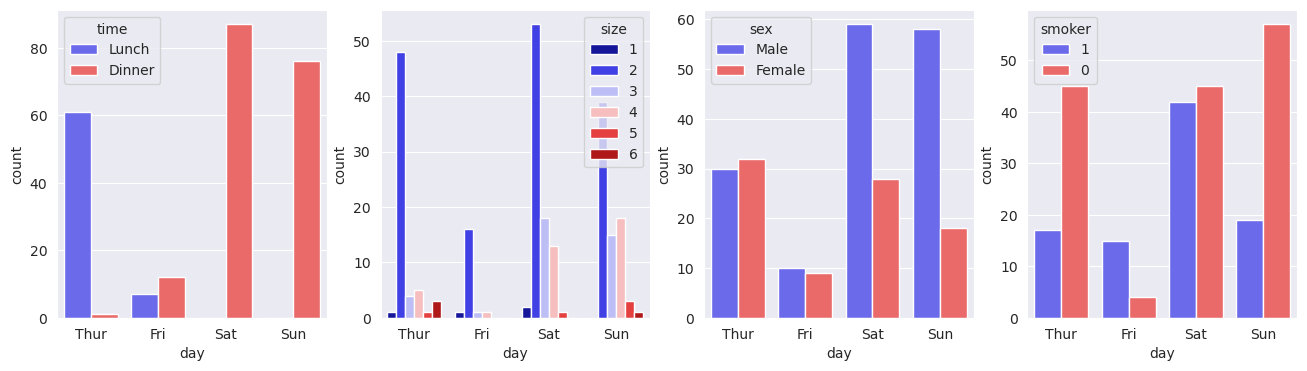

In [160]:
day_order = ["Thur", "Fri", "Sat", "Sun"]
f, axes = plt.subplots(1, 4, figsize=(16, 4))
print('График количества обслуживаемых столов по дням:')
sns.countplot(x="day", data=df, hue="time", order=day_order, ax=axes[0], palette='seismic');
sns.countplot(x=("day"), data=df, hue="size", order=day_order, ax=axes[1], palette='seismic');
sns.countplot(x="day", data=df, hue="sex", order=day_order, ax=axes[2], palette='seismic');
sns.countplot(x=("day"), data=df, hue="smoker", order=day_order, ax=axes[3], palette='seismic');

* Пятница - самый спокойный день. Самыми оживленными днями являются суббота и воскресенье, поэтому в выходные дни клиентов больше.
* Самый распространенный размер группы - 2 человека. Очень мало одиноких обедающих и очень мало партий из 5 и 6 человек.
* По четвергам и пятницам число мужчин и женщин, оплачивающих счета, практически одинаково, но в выходные дни число мужчин-плательщиков значительно превышает число женщин-плательщиков.
* Некурящих покупателей больше, чем курящих, в любой день, но особенно по четвергам и воскресеньям. Хотя по пятницам зарегистрировано гораздо меньше клиентов, чем в другие дни, эти клиенты в основном курящие.
* В обеденный перерыв количество мужчин и женщин, оплачивающих счет, практически одинаково, но в обеденный перерыв мужчин гораздо больше. В целом, мужчин-плательщиков больше.

График регрессии ниже показывает тенденцию к увеличению суммы чаевых по мере увеличения общего счета:

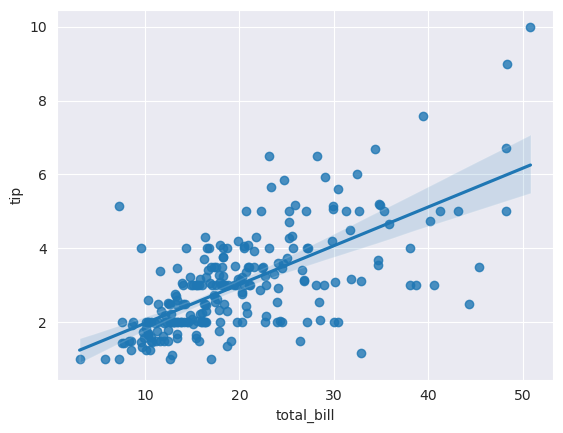

In [161]:
sns.regplot(data=df, x='total_bill', y='tip');

В наборе данных плательщиков-мужчин больше, чем плательщиков-женщин, но разница на линии регрессии невелика: мужчины, как правило, дают не много чаевых за счета меньшего размера, но крупнее чаевые - за счета большего размера. Женщины дают чаевые более регулярно, но на меньшие суммы.

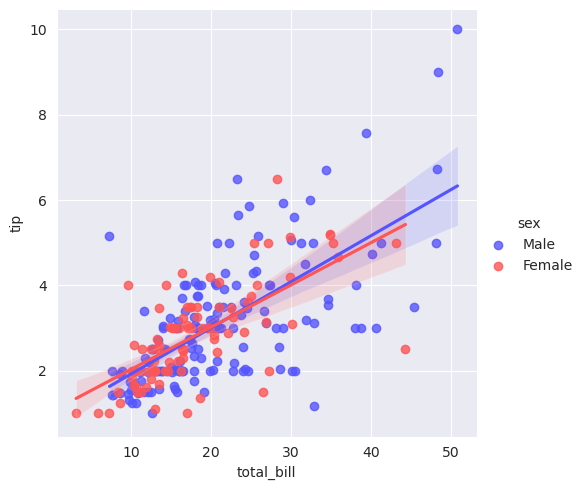

In [162]:
sns.lmplot(data=df, x='total_bill', y='tip', hue='sex', palette='seismic');

Похоже, что некурящие, как правило, более бережливы при счетах меньшего размера, но более щедры при счетах большего размера, в то время как некурящие склонны платить более высокие чаевые за счета меньшего размера, но становятся менее щедрыми по мере увеличения суммы счета. Судя по графикам, можно предположить, что статус курения действительно влияет на сумму чаевых.

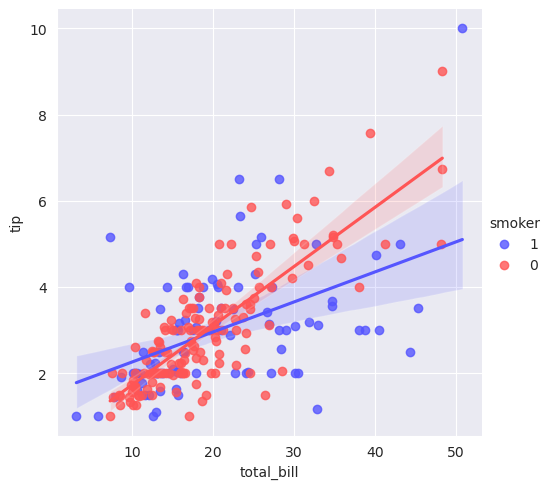

In [163]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=df, palette='seismic');
